<a href="https://colab.research.google.com/github/achanhon/coursdeeplearningcolab/blob/master/illustration_cours_ensta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### COURS INTRODUCTION AU DEEP LEARNING (ENSTA)

Dans un premier temps, l'objectif est d'insister entre la différence entre une architecture de réseau de neurones (qui peut coder différentes fonctions via les valeurs d'un ensemble de poids).

Considérons par exemple un réseau de neurones sur des points 2D fait de 3 neurones en couche caché et 1 neurone terminal.

In [ ]:
import torch

class LittleNet(torch.nn.Module):
    def __init__(self):
        super(LittleNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, 3, bias=False)
        self.fc2 = torch.nn.Linear(3, 1, bias=False)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

donnons lui une initialisation arbitraire, et regardons le signe de la fonction correspondante dans le plan

torch.Size([100, 2])


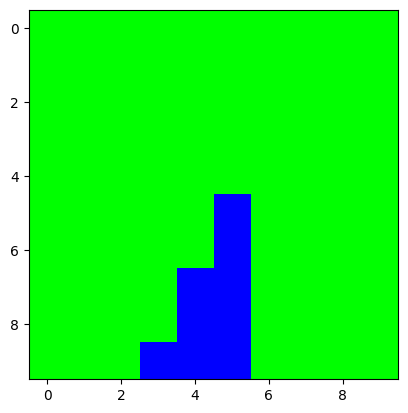

In [ ]:
import matplotlib.pyplot as plt
grid = []
for i in range(-5,5):
  for j in range(-5,5):
    grid.append(torch.Tensor([i,j]))
grid = torch.stack(grid).long()
print(grid.shape)

net = LittleNet()
output = net(grid.float())

visu = torch.zeros(10,10,3)
for k in range(grid.shape[0]):
  if output[k]>0:
    visu[grid[k][0]+5][grid[k][1]+5][1]=1
  else:
    visu[grid[k][0]+5][grid[k][1]+5][2]=1

plt.imshow(visu.numpy())
plt.show()

-----
l'objectif de la suite est d'illustrer le concepte de différentiation automatique implémenté dans pytorch, indépendamment d'un réseau de neurones.
-----

imaginons qu'on ait une fonction bizarre


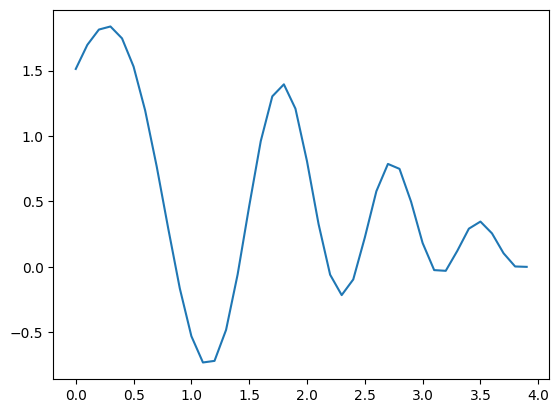

In [24]:
import torch
import matplotlib.pyplot as plt

def f(x):
  return (1+ torch.sin(x)) * (1 + torch.sin((x+1)*(x+1)) * (1+5*torch.exp(-x)))/4

with torch.no_grad():
  x = torch.Tensor([0.1*i for i in range(40)])
  plt.plot(x.numpy(), f(x).numpy())

et qu'on veuille l'approximer sur [0,4] avec un polynome de degrée 5

[[9.4766518e-05 1.1305191e-04 2.5358418e-04 6.6407333e-04 1.8635821e-03]] 0.7528300881385803 2.989057779312134
[[ 0.07737374  0.05718125  0.07890695  0.09752589 -0.02862203]] 0.6848886609077454 0.5497459173202515
[[ 0.14425479  0.09600309  0.1253099   0.14973478 -0.04881188]] 0.6619340777397156 0.3657838702201843
[[ 0.2045569   0.12371904  0.15246922  0.17603596 -0.05969509]] 0.6498689651489258 0.25435134768486023
[[ 0.26059794  0.14458583  0.16800329  0.18687928 -0.06500562]] 0.6418770551681519 0.18660786747932434
[[ 0.3137797   0.16117011  0.17650133  0.18855557 -0.06699174]] 0.6354813575744629 0.1511613130569458
[[ 0.3649513   0.17502111  0.18072812  0.18485032 -0.06700674]] 0.629779040813446 0.1445290446281433
[[ 0.4146298   0.18707469  0.18234938  0.17804082 -0.0658651 ]] 0.6244385838508606 0.14127568900585175
[[ 0.4631315   0.19789752  0.18236901  0.16949591 -0.06405675]] 0.6193355321884155 0.14030611515045166
[[ 0.5106523   0.20783387  0.18139261  0.1600373  -0.06187617]] 0.6144

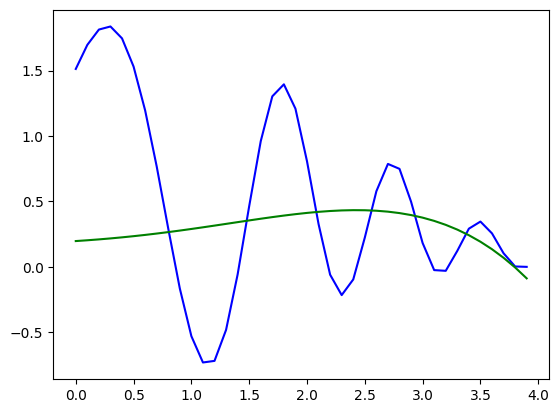

In [25]:
def poly(coef,x):
  xP = torch.pow(x.unsqueeze(1), torch.Tensor([0.,1.,2.,3.,4.]))
  return (coef * xP).mean(1)

coef = torch.zeros(1,5).requires_grad_()
optimizer = torch.optim.SGD([coef],lr = 0.001)
for i in range(10000):
  x = torch.Tensor([0.1*i for i in range(40)])
  currentloss = ((f(x)-poly(coef,x))**2).mean() # mse loss between f and current approximation
  optimizer.zero_grad()
  currentloss.backward()
  torch.nn.utils.clip_grad_norm_(coef,2)
  optimizer.step()
  if i%499==0:
    print(coef.detach().numpy(),float(currentloss),float(coef.grad.abs().sum()))

with torch.no_grad():
  x = torch.Tensor([0.1*i for i in range(40)])
  plt.plot(x.numpy(),f(x).numpy(), color='blue')
  plt.plot(x.numpy(),poly(coef,x).numpy(), color='green')
  plt.show

[[ 0.98802286  0.28719994  0.1524724   0.05832167 -0.0359767 ]] 0.5696181058883667 0.11684355139732361
[[ 1.0275887   0.29237884  0.14926185  0.0505814  -0.0339254 ]] 0.566277801990509 0.11461517214775085
[[ 1.0665992   0.29726753  0.14598972  0.04310217 -0.03193222]] 0.5630383491516113 0.11242663115262985
[[ 1.1050658   0.3018721   0.14265779  0.03587943 -0.02999624]] 0.5598961114883423 0.11027739942073822
[[ 1.1429982   0.30619857  0.13926788  0.02890847 -0.0281165 ]] 0.5568474531173706 0.10816813260316849
[[ 1.1804065   0.31025255  0.13582148  0.02218448 -0.02629194]] 0.5538888573646545 0.10609720647335052
[[ 1.2172983   0.31403944  0.13232023  0.01570265 -0.02452154]] 0.5510173439979553 0.1040659248828888
[[ 1.2536863   0.317565    0.12876521  0.00945828 -0.02280427]] 0.5482295155525208 0.10207343101501465
[[ 1.2895762   0.3208343   0.12515809  0.00344658 -0.02113906]] 0.5455223917961121 0.10011804848909378
[[ 1.3249791   0.32385272  0.12149997 -0.00233704 -0.01952493]] 0.542893171

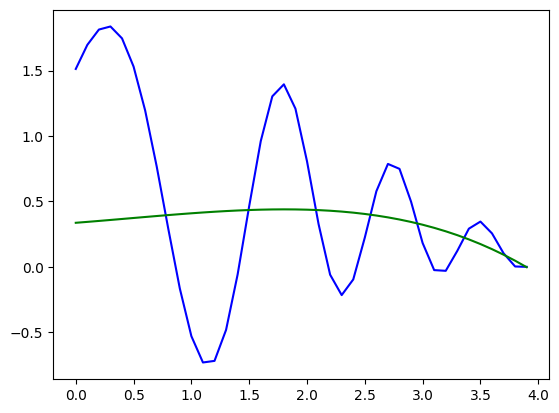

In [26]:
for i in range(10000):
  x = torch.Tensor([0.1*i for i in range(40)])
  currentloss = ((f(x)-poly(coef,x))**2).mean() # mse loss between f and current approximation
  optimizer.zero_grad()
  currentloss.backward()
  torch.nn.utils.clip_grad_norm_(coef,2)
  optimizer.step()
  if i%499==0:
    print(coef.detach().numpy(),float(currentloss),float(coef.grad.abs().sum()))

with torch.no_grad():
  x = torch.Tensor([0.1*i for i in range(40)])
  plt.plot(x.numpy(),f(x).numpy(), color='blue')
  plt.plot(x.numpy(),poly(coef,x).numpy(), color='green')
  plt.show

0.814503014087677
0.5705325603485107
0.43864813446998596
0.33669567108154297
0.2803463935852051
0.24679742753505707
0.2239854335784912
0.2014206498861313
0.1777823269367218
0.15517480671405792
0.13526475429534912
0.11476016044616699
0.0982666015625
0.08847522735595703
0.07867790758609772
0.07172197103500366
0.06614863872528076
0.06153109297156334
0.05742206051945686
0.05343344435095787
0.04899953678250313


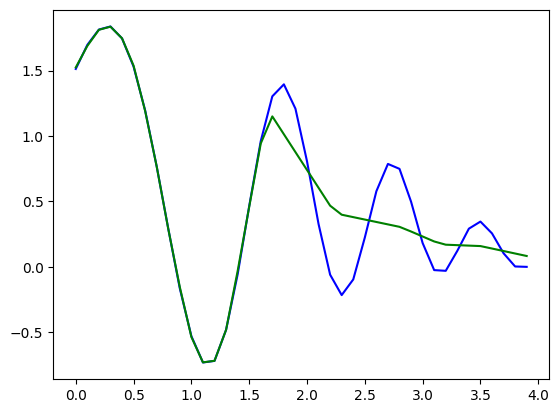

In [32]:
class mylittlemlp(torch.nn.Module):
    def __init__(self):
        super(mylittlemlp, self).__init__()
        self.fc1 = torch.nn.Linear(1, 60, bias=True)
        self.fc2 = torch.nn.Linear(60, 120, bias=True)
        self.fc3 = torch.nn.Linear(120, 240, bias=True)
        self.fc4 = torch.nn.Linear(240, 2, bias=True)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.fc1(x.unsqueeze(1)))
        x = torch.nn.functional.leaky_relu(self.fc2(x))
        x = torch.nn.functional.leaky_relu(self.fc3(x))
        return self.fc4(x).mean(1)

mlp = mylittlemlp()
mlp.cuda()
optimizer = torch.optim.Adam(mlp.parameters(),lr = 0.00001)
for i in range(10000):
  x = torch.Tensor([0.1*i for i in range(40)]).cuda()
  assert f(x).shape==mlp(x).shape
  currentloss = ((f(x)-mlp(x))**2).mean() # mse loss between f and current approximation
  optimizer.zero_grad()
  currentloss.backward()
  torch.nn.utils.clip_grad_norm_(mlp.parameters(),3)
  optimizer.step()
  if i%499==0:
    print(float(currentloss))

with torch.no_grad():
  x = torch.Tensor([0.1*i for i in range(40)])
  plt.plot(x.numpy(),f(x).numpy(), color='blue')
  plt.plot(x.numpy(),mlp(x.cuda()).cpu().numpy(), color='green')
  plt.show